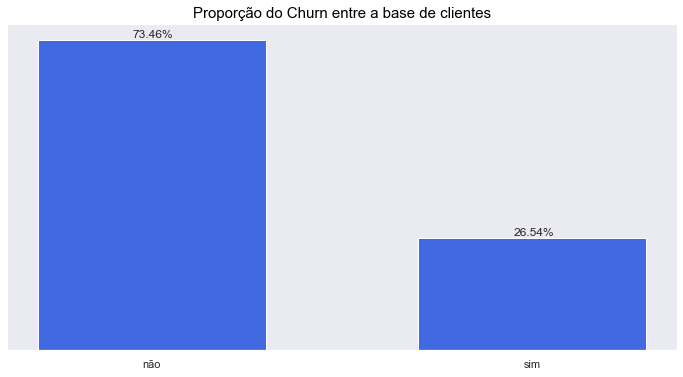

<Figure size 432x288 with 0 Axes>

In [4]:
# Importando bibliotecas

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import streamlit as st
import pandas as pd
import numpy as np
from PIL import Image
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Lendo os arquivos:

modelo = joblib.load(r"./modelo_churn.sav")

dataframe_final = pd.read_csv('dataframe_final.csv')


# Criando função para pré-processar as features:

def pre_processamento(df):
   
    def mapeamento(feature):
        return feature.map({'Sim':1, 'Não':0})

    lista = ['Idoso','Dependentes', 'Parceiro', 'Internet', 'Fatura_Online', 'Mensal','Anual', 
             'Bianual', 'Cartao_credito', 'Boleto_eletronico', 'Boleto_correios', 'Transf_banco']
    df[lista] = df[lista].apply(mapeamento)

    scaler = MinMaxScaler()
    df['Meses_Contrato'] = scaler.fit_transform(df[['Meses_Contrato']])
    df['Gasto_Mensal'] = scaler.fit_transform(df[['Gasto_Mensal']])
    df['Gasto_Total'] = scaler.fit_transform(df[['Gasto_Total']])
    return df


# Criando objeto do Streamlit:

def main():

    st.sidebar.info('Alura Voz - Menu')
    
    image = Image.open('churn.png')
    
    st.sidebar.image(image)
    
    pagina = st.sidebar.selectbox('Selecione a página desejada', ['Resumo gráfico', 'Modelo de predição'])
    

    if pagina == 'Resumo gráfico':
        
        st.title('Resumo das características dos clientes atuais da Alura Voz')
        
        grafico = st.selectbox('Escolha a visualização desejada', ['Proporção de churn entre clientes', 
                                                                   'Histograma - meses de contrato',
                                                                   'Boxplot - gastos por cliente e churn',
                                                                   'Boxplot - gasto total por cliente e tipo de internet',
                                                                   'Churn de clientes por tipo de contrato'])
        
        if grafico == 'Proporção de churn entre clientes':
        
            sns.set(style = 'darkgrid')
            proporcao_churn = round(dataframe_final.Churn.value_counts(normalize = True)*100, 2)
            labels = ['não', 'sim']
            plt.figure(figsize = (12, 6))
            plt.title('Proporção do Churn entre a base de clientes', fontsize = 15, color = 'black')
            plt.bar(labels, proporcao_churn, width = 0.6, color = "royalblue")
            plt.grid(False)
            for i, v in enumerate(proporcao_churn):
                plt.text(i - 0.05, v + 0.5, str(v) + '%')
            plt.yticks([])
            plt.show()
            st.pyplot(plt)
            
            st.info("Churn bem acima da média das principais empresas nacionais de telecomunicação (3%)")
        
        elif grafico == 'Histograma - meses de contrato':
            
            sns.set(style = 'darkgrid')
            plt.figure(figsize=(12,6))
            plt.xlabel('Tempo (meses)', color = 'black', fontsize = 12, labelpad = 15)
            ax = sns.histplot(x = dataframe_final['Meses_Contrato'], color = 'Blue', kde = False, bins = 20, label = 'meses de contrato')
            ax.set_title('Histograma - Tempo de contrato', fontsize = 15, color = 'black')
            ax.set_ylabel('Quantidade', color = 'black', fontsize = 12)
            ax.legend(fontsize = 12)
            plt.show()
            st.pyplot(plt)
            
            st.info("Grande quantidade de clientes em período inicial de contrato")
            
        elif grafico == 'Boxplot - gastos por cliente e churn':
            
            converte_churn = {0 : 'Não', 1: 'Sim'}

            dataframe_final['Churn'] = dataframe_final['Churn'].map(converte_churn)
            
            sns.set(style = 'darkgrid')
            f, axes = plt.subplots(1,2,figsize = (12,6))
            ax = sns.boxplot(data = dataframe_final, x = 'Churn', y = 'Gasto_Total', orient = 'v', ax = axes[0], palette="Set2")
            ax.set_title('Boxplot - Gasto Mensal por cliente e Churn', fontsize = 15, color = 'black')
            axes[0].set_title('Boxplot - Gasto Total por cliente e Churn', fontsize = 15, color = 'black')
            sns.boxplot(data = dataframe_final, x = 'Churn', y = 'Gasto_Mensal', orient = 'v', ax = axes[1], palette="Set2")
            axes[1].set_title('Boxplot - Gasto Mensal por cliente e Churn', fontsize = 15, color = 'black')
            plt.show()
            st.pyplot(plt)
            
            st.info("Clientes com maior gasto total tendem a permanecer na base")
            
        elif grafico == 'Boxplot - gasto total por cliente e tipo de internet':
            
            converte_internet = {'DSL' : 'DSL', 'Fiber optic': 'Fibra Ótica', 'No': 'Sem serviço'}

            dataframe_final['Internet'] = dataframe_final['Internet'].map(converte_internet)

            sns.set(style = 'darkgrid')
            plt.figure(figsize=(12,6))
            plt.xlabel('Valor Gasto, ($)', color = 'black', fontsize = 12, labelpad = 15)
            ax = sns.boxplot(data = dataframe_final, x = 'Internet', y = 'Gasto_Total', orient = 'v', width = 0.5)
            ax.set_title('Boxplot - Gasto Total por cliente e tipo de Internet', fontsize = 15, color = 'black')
            plt.show()
            st.pyplot(plt)
            
            st.info("Maior gasto total relativo a serviço de internet tipo Fibra Ótica")
            
        elif grafico == 'Churn de clientes por tipo de contrato':
            
            one_year =  dataframe_final[dataframe_final['Contrato'] == dataframe_final['Contrato'].unique()[0]]
            anual = round(one_year.Churn.value_counts(normalize = True)*100,2).to_frame(name = 'anual')
            month_to_month =  dataframe_final[dataframe_final['Contrato'] == dataframe_final['Contrato'].unique()[1]]
            mensal = round(month_to_month.Churn.value_counts(normalize = True)*100,2).to_frame(name = 'mensal')
            two_years =  dataframe_final[dataframe_final['Contrato'] == dataframe_final['Contrato'].unique()[2]]
            bianual = round(two_years.Churn.value_counts(normalize = True)*100,2).to_frame(name = 'bianual')

            churn_contrato = pd.concat([mensal, anual, bianual], axis = 1)
            churn_contrato.index.name = 'Churn'
            churn_contrato.rename(index = {0: 'não', 1: 'sim'}, inplace = True)
            churn_contrato.reset_index(inplace = True)

            sns.set(style = 'darkgrid')
            fig = px.bar(churn_contrato, x='Churn', y=["mensal", "anual", "bianual"], title="Churn de clientes (%) por Tipo de Contrato")
            st.plotly_chart(fig)
            
            st.info("Redução da taxa de churn conforme aumenta o período contratual")
    
    elif pagina == 'Modelo de predição':

        st.title('Avaliação de Churn entre a base de clientes da Alura Voz')

        st.markdown("""
        Através deste app é possível avaliar se um determinado cliente da empresa Alura Voz tem predisposição de se desligar da empresa (churn). \n
        """)
        st.markdown("<h3></h3>", unsafe_allow_html=True)

        st.info("Escolha dentre as opções abaixo as informações pertinentes ao cliente")

        st.subheader("Features")

        idoso = st.selectbox('Idade igual ou maior que 65 anos :', ('Sim', 'Não'))
        dependentes = st.selectbox('Possui dependentes:', ('Sim', 'Não'))
        parceiro = st.selectbox('Possui relacionamento estável:', ('Sim', 'Não'))
        meses_Contrato = st.slider('Número de meses na Alura Voz', min_value=0, max_value=72, value=0)
        internet = st.selectbox('Possui serviço de internet :', ('Sim', 'Não'))
        fatura_Online = st.selectbox('Possui pagamento de fatura online :', ('Sim', 'Não'))
        gasto_Mensal = st.number_input('Gasto mensal', min_value=0, max_value=150, value=0)
        gasto_Total = st.number_input('Gasto total',min_value=0, max_value=10000, value=0)
        mensal = st.selectbox('Possui contrato mensal :', ('Sim', 'Não'))
        anual = st.selectbox('Possui contrato anual :', ('Sim', 'Não'))
        bianual = st.selectbox('Possui contrato bianual :', ('Sim', 'Não'))
        cartao_credito = st.selectbox('Pagamento por cartão de crédito :', ('Sim', 'Não'))
        boleto_eletronico = st.selectbox('Pagamento por boleto eletrônico :', ('Sim', 'Não'))
        boleto_correios = st.selectbox('Pagamento por boleto físico :', ('Sim', 'Não'))
        transf_banco = st.selectbox('Pagamento por transferência bancária :', ('Sim', 'Não'))


        dicio = {
                'Idoso': idoso,
                'Dependentes': dependentes,
                'Parceiro': parceiro,
                'Meses_Contrato': meses_Contrato,
                'Internet': internet,
                'Fatura_Online': fatura_Online,
                'Gasto_Mensal': gasto_Mensal,
                'Gasto_Total': gasto_Total,
                'Mensal': mensal,
                'Anual': anual,
                'Bianual': bianual,
                'Cartao_credito': cartao_credito,
                'Boleto_eletronico': boleto_eletronico,
                'Boleto_correios': boleto_correios,
                'Transf_banco': transf_banco
                }

        features_df = pd.DataFrame.from_dict([dicio])
        st.markdown("<h3></h3>", unsafe_allow_html=True)
        st.write('Resumo das features')
        st.markdown("<h3></h3>", unsafe_allow_html=True)
        st.dataframe(features_df)


        preprocess_df = pre_processamento(features_df)

        predicao = modelo.predict(preprocess_df)

        if st.button('Avaliar'):
            if predicao == 1:
                st.warning('O cliente TEM predisposição ao Churn.')
            else:
                st.success('O cliente NÃO TEM predisposição ao Churn')
        


if __name__ == '__main__':
    
    main()